In [22]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [23]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [24]:
n_neighbors = range(1, 105, 1)
print n_neighbors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]


In [25]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

# 1

In [28]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print scores

[0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.93333333333333335, 0.91111111111111109, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.933333333333333

#2

In [29]:
clf = neighbors.KNeighborsClassifier(10)
mean_scores = cross_val_score(clf, iris_df.values, iris.target, cv = 5)
np.mean(mean_scores)

0.98000000000000009

#3

In [30]:
max_idx = [idx + 1 for idx, score in enumerate (scores) if score == max (scores)]
print 'highest scores for k: ', max_idx

highest scores for k:  [6, 8, 11]


#4

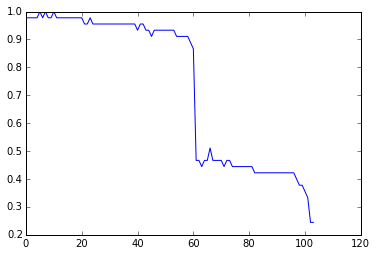

In [31]:
plt.plot(scores)

There are two clusters.  Between a k of 0 and 60 the point is predicted with a relative amount of accuracy.  Between a k of 61 and 100 the distance extends to the second cluster and the accuracy of predicting the point reduces to about 45%.  After a k of 100, the prediction of the point is relatively not accurate.

##5

Below I am trying to shuffle the data set and split it into training and test data. I would then randomize the data four more times.

In [40]:
x = np.random.rand(100,5)
y = np.random.rand(100,5)

training_idx = np.random.randint(x.shape[0], size=80)
test_idx = np.random.randint(x.shape[0], size=20)

training_idy = np.random.randint(y.shape[0], size=80)
test_idy = np.random.randint(y.shape[0], size=20)

training, test = [(x[training_idx,:], x[test_idx,:]), (y[training_idy,:], y[test_idy,:])]

Below I am trying to run one of the 5 data sets through the KNN Classifier algorithm to get the accuracy score, but I can't seem to get the scripting language to work.  I would then do this with the other four shuffled data sets and average the score and compare it to the score of 0.98 obtained in #2. 

In [50]:
manual_scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(training_idx, training_idy)
    manual_scores.append(clf.score(test_idx, test_idy))
print manual_scores

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 20 while Y.shape[1] == 80